# FINAL PROJECT

## Library

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
import pickle
from sklearn.utils import shuffle

## Data preparing

### Raw Data

In [584]:
df = pd.read_excel('mean_data.xlsx', index_col=0)

In [585]:
print(df)

        video id  Question 2: Sound (1-5)  Question 2.1: Music (1-5)  \
0    mSg4AmqvT0I                        4                          4   
1    Lol8sqRfQYE                        3                          3   
2    kwwGvRUyIG8                        4                          4   
3    52alUCchcBw                        2                          2   
4    iDCC0SEHDY8                        3                          3   
..           ...                      ...                        ...   
130  Yr9Z19ZWMfg                        4                          3   
131  umhYUSmtkIw                        3                          3   
132  7JsskyOhp0I                        4                          4   
133  usrgPQ74WVA                        3                          3   
134  eZCiJihCPUE                        5                          5   

     Question 2.2 : Noise control (1-5)  Question 2.3 : Speaking Style (1-5)  \
0                                     3                

In [586]:
df.columns

Index(['video id', 'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)', 'Attractive Level (1-5)'],
      dtype='object')

In [587]:
input_columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)','Question 2.2 : Noise control (1-5)','Question 2.3 : Speaking Style (1-5)', 
       'Question 3: Camera (1-5)','Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)', 'Question 4.2: Color (1-5)', 
       'Question 5: Content (1-5)', 'Question 5.1: Introduction (0-1)', 'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)', 'Question 6.2: Recommendation (0-1)', 'Question 6.3: Clear information (0-1)'
       ]
main_columns = [
        'Question 2: Sound (1-5)',
        'Question 3: Camera (1-5)',
        'Question 4: Images (1-5)', 
        'Question 5: Content (1-5)',
        'Question 6: Reviewer (1-5)'
       ]
output_column = 'Attractive Level (1-5)'
Id_Alevel =[
        'video id',
        'Attractive Level (1-5)',]

### Train_Test Data

In [588]:
X_train, X_test, y_train, y_test = train_test_split(df[main_columns][:], df[output_column][:], test_size=0.2, shuffle=True)

In [589]:
print(X_train.shape)
print(X_test.shape)

(108, 5)
(27, 5)


### Data oversampling

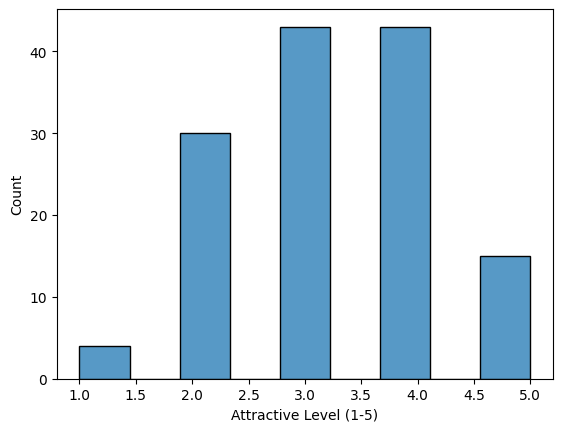

In [590]:
sns.histplot(data=df[output_column])
plt.show()

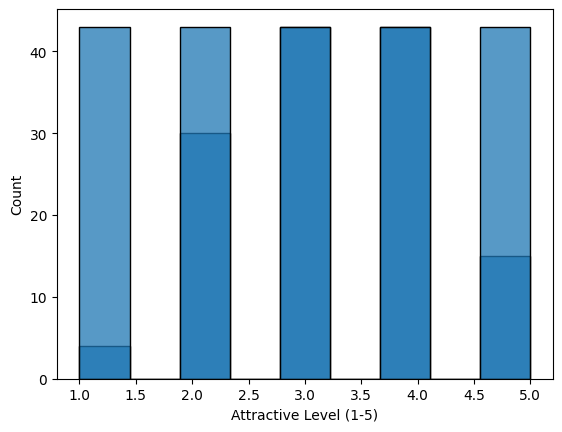

In [606]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2, random_state=0)
X_os, y_os = oversample.fit_resample(df[input_columns][:], df[output_column][:])
# X, y = pf[core_columns][:], pf[output_column][:]
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, shuffle=True)
sns.histplot(data=df[output_column])
sns.histplot(data=y_os)
plt.show()

In [592]:
X = df[main_columns][:]
shuffle(X)

,Question 2: Sound (1-5),Question 3: Camera (1-5),Question 4: Images (1-5),Question 5: Content (1-5),Question 6: Reviewer (1-5)
16,5,5,5,5,5
36,3,3,3,2,2
78,3,5,3,2,2
108,4,5,5,4,3
56,3,2,3,2,2
...,...,...,...,...,...
120,4,4,4,4,4
25,4,4,4,3,4
37,3,2,3,2,2
106,2,2,3,1,2


In [593]:
#from imblearn.over_sampling import RandomOverSampler
#X_train, y_train =RandomOverSampler(random_state=42).fit_resample(X_train, y_train)
#sns.histplot(data=y_train)
#plt.show()

## Modeling

### Linear Regression

Linear Regression:


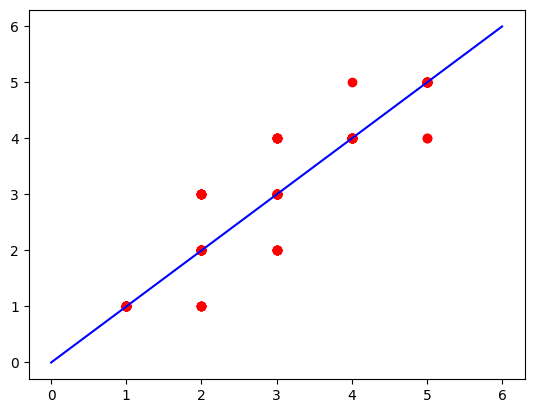

train accuracy:  0.8202950840095816
test accuracy:  0.7961377752682101
MSE train:  0.15527006462936513
RMSE train:  0.3940432268538125
MSE test:  0.19456704494564842
RMSE test:  0.4410975458395211


In [594]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
clf = LinearRegression()
clf.fit(X_train, y_train)
pickle.dump(clf, open('./Linear_Regression_model', 'wb'))

print('Linear Regression:')

train_result = clf.predict(X_train)
plt.plot(train_result.round(), y_train.round(), 'ro')
plt.plot([0,6],[0,6], 'b-')
plt.show()
print('train accuracy: ', f1_score(train_result.round(), y_train, average='macro'))
test_result = clf.predict(X_test)
print('test accuracy: ', f1_score(test_result.round(), y_test, average='macro'))


MSE = mean_squared_error(train_result, y_train)
RMSE = math.sqrt(MSE)
print("MSE train: ", MSE)
print("RMSE train: ", RMSE)



MSE = mean_squared_error(test_result, y_test)
RMSE = math.sqrt(MSE)
print("MSE test: ", MSE)
print("RMSE test: ", RMSE)


In [595]:
print(clf.coef_)


[ 0.30941395  0.02128652  0.01398795  0.05229096  0.16145588  0.19111042
 -0.06494877  0.01670565  0.09589611 -0.0229821   0.06316656 -0.04071431
 -0.03952931  0.19997748  0.41824238  0.15849373  0.3412481 ]


### Logistic Regression

In [596]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1, solver="lbfgs", max_iter=1e4)
y1 = y_train.copy()
y1[y1 < 3] = 0
y1[y1 >= 3] = 1
y2 = y_test.copy()
y2[y2 < 3] = 0
y2[y2 >= 3] = 1
clf.fit(X_train, y1)
pickle.dump(clf, open('./Logistic_Regression_model', 'wb'))

print('Logistic Regression:')
print('train accuracy: ',f1_score(clf.predict(X_train), y1, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y2, average='macro'))

Logistic Regression:
train accuracy:  0.932580265830453
test accuracy:  0.9528508771929824


In [597]:
print(clf.coef_)


[[ 0.68844707  0.02932722  0.05584783  0.05956115  0.70512633  1.05843888
  -0.03202144 -0.33688494  1.07012393  0.86972185  1.09776325 -0.05740914
   0.51639146  0.22449235  0.99037447 -0.01853142  0.60316618]]


### Classification

In [598]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(20, 20, 20))
clf.fit(X_train, y_train)
pickle.dump(clf, open('./MLP_model', 'wb'))

print('Multilayer Perceptron:')
print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))

Multilayer Perceptron:
train accuracy:  0.8479370854370855
test accuracy:  0.7435714285714285


c:\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [599]:
print(clf.classes_)

[1 2 3 4 5]


### K_means Clustering

In [600]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [601]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.9400361072984398
2 : 1.3980195977087193
3 : 1.2552163860704673
4 : 1.1362510052583712
5 : 1.0872669110998623
6 : 1.0525646079801907
7 : 0.9862848699860028
8 : 0.9648439630001382
9 : 0.9266895450515095


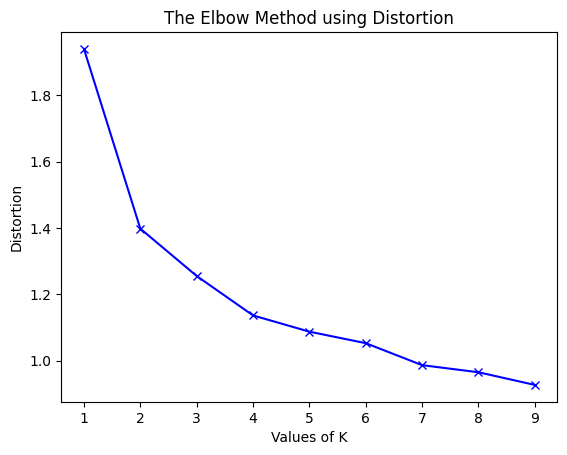

In [602]:
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [603]:
clf = KMeans(n_clusters=3)
Y_Kmeans = clf.fit_predict(X)
pickle.dump(clf, open('./K_means_model', 'wb'))

Y_Kmeans
#print('train accuracy: ',f1_score(train, y_train, average='micro'))
#print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='micro'))

array([1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1,
       1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0,
       1, 0, 1])

In [604]:
for i in range(0,3):
    print("Center ",i+1)
    print("Size: ",len(df['video id'][Y_Kmeans==i]))
    print(df[Id_Alevel][Y_Kmeans==i].tail(5))
    print("-------------------------------------------------")


Center  1
Size:  54
        video id  Attractive Level (1-5)
124  B1zTL3RLlkg                       2
125  0vMXuiMGYkY                       3
128  _m3h0tI464Y                       4
131  umhYUSmtkIw                       3
133  usrgPQ74WVA                       2
-------------------------------------------------
Center  2
Size:  46
        video id  Attractive Level (1-5)
123  PkZt3ljyn4M                       5
126  TeE0xUNdtK4                       4
130  Yr9Z19ZWMfg                       4
132  7JsskyOhp0I                       4
134  eZCiJihCPUE                       4
-------------------------------------------------
Center  3
Size:  35
        video id  Attractive Level (1-5)
110  rU5DYb2sZPw                       2
111  bUg5DRoFhPk                       2
121  QZ_PhvS3FGY                       2
127  h9qgh9CZYho                       2
129  atHAabNpQEI                       1
-------------------------------------------------


In [605]:
for i in range(0,3):
    print("Center ",i+1)
    print("Size: ",len(df['video id'][Y_Kmeans==i]))
    print(df[Id_Alevel][Y_Kmeans==i])
    print("-------------------------------------------------")


Center  1
Size:  54
        video id  Attractive Level (1-5)
1    Lol8sqRfQYE                       2
4    iDCC0SEHDY8                       2
5    QXGyszq4pic                       3
6    w8f4mRCLrdU                       4
7    r1BzB2-Cx7k                       3
8    mfXlFpnduoA                       4
14   RhJ7Cp7_ojU                       4
20   DceuZyI6rHk                       3
21   8-2XcUzHtIo                       3
23   JG_LLt3QYbs                       3
27   G9uP3B8nDzY                       3
28   nruK2pDiAEA                       3
29   EFbxgnqqblE                       3
31   U3OwOM-4DaU                       2
32   eZyK0ED21vI                       2
40   TCTpiQLZxrI                       3
42   z5j8rKWPCcU                       3
43   Zvk06Y6E7Rk                       3
44   IESQ3POtkx0                       3
47   gCVnzXm09Jo                       3
50   NgX99Cljm0c                       4
51   jIn-9E0jVpY                       3
53   zcJuiziyy-E                     